<a href="https://colab.research.google.com/github/ashiqurrahmankhan21st/BreastCancer/blob/main/Breast_Cancer_V2_Gaussion_Cop_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
#import keras_metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import time

In [10]:
#original data
df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/GC_SDV_BreastCancer.csv")
del df['Unnamed: 0']
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,12.759,17.02,80.93,509.4,0.06687,0.03913,0.025046,0.016961,0.1493,...,13.858,23.49,88.06,590.4,0.12370,0.13034,0.145731,0.075146,0.2831,0.07432
1,M,11.306,19.79,74.48,390.1,0.10894,0.10373,0.114211,0.053879,0.2135,...,13.389,27.58,90.55,548.5,0.14599,0.26635,0.364920,0.154583,0.4364,0.10487
2,M,12.325,24.63,81.38,484.2,0.11996,0.16272,0.067551,0.047048,0.2181,...,13.615,31.28,92.97,611.2,0.14752,0.37139,0.172141,0.110892,0.3186,0.10515
3,B,10.635,24.89,68.67,341.9,0.08418,0.08830,0.027259,0.006019,0.1938,...,11.340,29.58,75.24,397.9,0.13029,0.15898,0.044588,0.052535,0.2564,0.08163
4,M,28.110,29.74,188.50,2286.8,0.06442,0.06746,0.191878,0.115942,0.1850,...,36.040,36.01,232.15,3615.1,0.11879,0.19572,0.576466,0.216770,0.4201,0.06176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,13.590,25.97,88.89,597.2,0.09826,0.10244,0.048636,0.036183,0.1586,...,14.961,34.97,96.72,719.5,0.14368,0.23676,0.144657,0.096611,0.2627,0.08677
9996,B,13.292,19.63,86.72,554.2,0.09190,0.13122,0.059075,0.031142,0.1773,...,16.561,27.23,109.80,875.1,0.13810,0.30831,0.222822,0.105450,0.3257,0.08708
9997,B,9.346,22.18,60.79,275.9,0.10120,0.09687,0.040308,0.022831,0.1485,...,10.957,34.94,71.87,362.1,0.14212,0.20370,0.096103,0.080021,0.2338,0.10824
9998,B,10.727,19.67,68.48,352.5,0.08418,0.07468,0.078046,0.030488,0.1610,...,11.669,30.02,75.03,408.7,0.13676,0.18993,0.211117,0.100522,0.2035,0.08088


In [11]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['diagnosis']).copy()
X = df.drop(columns=['diagnosis']).copy()
X = StandardScaler().fit_transform(X).copy()

In [12]:
df['diagnosis'].value_counts()

B    6085
M    3915
Name: diagnosis, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=123)
print("Original data : ",df.shape)
print("tarin         : ",X_train.shape)
print("test          : ",X_test.shape[0])
#print("validation    : ",X_val.shape[0])

Original data :  (10000, 31)
tarin         :  (8000, 30)
test          :  2000


In [14]:
# SVM
svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
svm.fit(X_train, y_train)
STr = svm.score(X_train, y_train)
STe = svm.score(X_test, y_test)
y_pred_svm = svm.predict(X_test)

In [15]:
#ANN
tf.random.set_seed(123)
ANNmodel = Sequential()
ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
ANNmodel.add(Dense(10, activation='relu'))
ANNmodel.add(Dense(1, activation='sigmoid'))
ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
ATr = ANNmodel.evaluate(X_train,y_train,verbose=0)[1]
ATe = ANNmodel.evaluate(X_test,y_test,verbose=0)[1]
y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")

Epoch 1/20
57/57 [==============================] - 2s 10ms/step - loss: 0.6048 - accuracy: 0.6607 - val_loss: 0.5072 - val_accuracy: 0.7412
Epoch 2/20
57/57 [==============================] - 0s 3ms/step - loss: 0.5230 - accuracy: 0.7431 - val_loss: 0.4900 - val_accuracy: 0.7650
Epoch 3/20
57/57 [==============================] - 0s 3ms/step - loss: 0.5107 - accuracy: 0.7465 - val_loss: 0.4877 - val_accuracy: 0.7650
Epoch 4/20
57/57 [==============================] - 0s 3ms/step - loss: 0.5052 - accuracy: 0.7510 - val_loss: 0.4859 - val_accuracy: 0.7650
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.7528 - val_loss: 0.4842 - val_accuracy: 0.7650
Epoch 6/20
57/57 [==============================] - 0s 3ms/step - loss: 0.5001 - accuracy: 0.7565 - val_loss: 0.4827 - val_accuracy: 0.7700
Epoch 7/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4981 - accuracy: 0.7575 - val_loss: 0.4846 - val_accuracy: 0.7688
Epoch 8/20
57/57 [=

In [16]:
#XGBoost
params = {
            'objective':'binary:logistic',
            'max_depth': 7,
            'alpha': 10,
            'learning_rate': 1,
            'n_estimators':100
        }
xgb = XGBClassifier(objective='binary:logistic',max_depth= 7,alpha= 10,learning_rate= 1,n_estimators=100)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
XTr = accuracy_score(y_train, xgb.predict(X_train))
XTe = accuracy_score(y_test, xgb.predict(X_test))
XTr,XTe

(0.983125, 0.724)

In [17]:
#KNN
# Define the range of n_neighbors values to test
n_neighbors_values = [1,3, 5, 7, 9, 11]

best_accuracy = 0.0
best_n_neighbors = None

for n_neighbors in n_neighbors_values:
    print("Number of Neighbors:", n_neighbors)

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)

    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test))

    print('KNN model train accuracy score: {0:0.4f}'.format(train_accuracy))
    print('KNN model test accuracy score: {0:0.4f}'.format(test_accuracy))
    print()

    # Check if the current test accuracy is better than the previous best
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_n_neighbors = n_neighbors
print("best neighbours: ", best_n_neighbors)
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
KTr = accuracy_score(y_train, knn.predict(X_train))
KTe = accuracy_score(y_test, knn.predict(X_test))
y_pred_knn = knn.predict(X_test)
KTr,KTe


Number of Neighbors: 1
KNN model train accuracy score: 1.0000
KNN model test accuracy score: 0.6770

Number of Neighbors: 3
KNN model train accuracy score: 0.8323
KNN model test accuracy score: 0.6955

Number of Neighbors: 5
KNN model train accuracy score: 0.7936
KNN model test accuracy score: 0.7090

Number of Neighbors: 7
KNN model train accuracy score: 0.7846
KNN model test accuracy score: 0.7160

Number of Neighbors: 9
KNN model train accuracy score: 0.7774
KNN model test accuracy score: 0.7275

Number of Neighbors: 11
KNN model train accuracy score: 0.7722
KNN model test accuracy score: 0.7340

best neighbours:  11


(0.77225, 0.734)

In [18]:
#RF
rf = RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123)
rf.fit(X_train, y_train)
RTr = accuracy_score(y_train, rf.predict(X_train))
RTe = accuracy_score(y_test, rf.predict(X_test))
y_pred_rf = rf.predict(X_test)
RTr,RTe

(0.75175, 0.7565)

In [19]:
#LR
lr = LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123)
lr.fit(X_train, y_train)
LTr = accuracy_score(y_train, lr.predict(X_train))
LTe = accuracy_score(y_test, lr.predict(X_test))
y_pred_lr = lr.predict(X_test)
LTr,LTe

(0.7615, 0.7565)

In [20]:
def CVal(ML):

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/GC_SDV_BreastCancer.csv")
  del df['Unnamed: 0']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
    ML.fit(X_train, y_train)
    y_pred_ML = ML.predict(X_test)


    y_pred.append(y_pred_ML)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]+1

  y_pred_final = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_final.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass
  return y_pred_final

In [21]:
def CValANN():

  df = pd.read_csv("https://raw.githubusercontent.com/ashiqurrahmankhan21st/BreastCancer/main/GC_SDV_BreastCancer.csv")
  del df['Unnamed: 0']

  s = 0
  e = round(df.shape[0]*.2)

  y_pred = []
  y_original = []

  for i in range(5):

    test_set  = df.iloc[s:e,:]
    train_set = df.drop(test_set.index)

    X_train = StandardScaler().fit_transform(train_set.drop(columns=['diagnosis'])).copy()
    y_train = encoder.fit_transform(train_set['diagnosis']).copy()
    X_test = StandardScaler().fit_transform(test_set.drop(columns=['diagnosis'])).copy()
    y_test = encoder.fit_transform(test_set['diagnosis']).copy()

    #svm = SVC(C=0.1, gamma='auto', kernel = 'rbf')
    tf.random.set_seed(123)
    ANNmodel = Sequential()
    ANNmodel.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
    ANNmodel.add(Dense(10, activation='relu'))
    ANNmodel.add(Dense(1, activation='sigmoid'))
    ANNmodel.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy']) #tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
    ANNmodel.fit(X_train,y_train, batch_size = 128, epochs = 20, validation_split = 0.1)
    y_pred_ANN = (ANNmodel.predict(X_test) > 0.5).astype("int32")


    y_pred.append(y_pred_ANN)
    y_original.append(y_test)

    s = e
    e = e + round(df.shape[0]*.2)
    if e-s < round(df.shape[0]*.2):
      e = df.shape[0]

  y_pred_fina = []
  y_original_final = []

  try:
    for i in range(5):
      for j in range(round(df.shape[0]*.2)):
        y_pred_fina.append(y_pred[i][j])
        y_original_final.append(y_original[i][j])
  except:
    pass

  y_pred_final = []

  for i in range(len(y_pred_fina)):
    y_pred_final.append(y_pred_fina[i][0])

  return y_pred_final

In [22]:
newdata = pd.DataFrame({
    "SVM": CVal(SVC(C=0.1, gamma='auto', kernel = 'rbf'))
})
newdata["KNN"] = CVal(KNeighborsClassifier(n_neighbors=3))
newdata["RF"]  = CVal(RandomForestClassifier(n_estimators= 500,max_features = 'sqrt', max_samples = 100, random_state=123))
newdata['LR']  = CVal(LogisticRegression(C= 0.1 , penalty='l1', solver='liblinear', max_iter = 1000, random_state=123))
newdata["ANN"] = CValANN()
newdata["XGB"] = CVal(XGBClassifier(objective='binary:logistic',max_depth= 7,alpha= 10,learning_rate= 1,n_estimators=100))
newdata['y_test'] = encoder.fit_transform(df['diagnosis']).copy()

Epoch 1/20
57/57 [==============================] - 1s 6ms/step - loss: 0.5777 - accuracy: 0.6886 - val_loss: 0.5072 - val_accuracy: 0.7412
Epoch 2/20
57/57 [==============================] - 0s 3ms/step - loss: 0.5135 - accuracy: 0.7528 - val_loss: 0.4941 - val_accuracy: 0.7437
Epoch 3/20
57/57 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.7569 - val_loss: 0.4910 - val_accuracy: 0.7563
Epoch 4/20
57/57 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7565 - val_loss: 0.4890 - val_accuracy: 0.7538
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.7576 - val_loss: 0.4889 - val_accuracy: 0.7513
Epoch 6/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4967 - accuracy: 0.7574 - val_loss: 0.4898 - val_accuracy: 0.7550
Epoch 7/20
57/57 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.7601 - val_loss: 0.4886 - val_accuracy: 0.7538
Epoch 8/20
57/57 [==

In [23]:
newdata.head()

,SVM,KNN,RF,LR,ANN,XGB,y_test
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,1,1,1,0,0,1,1
3,0,0,0,0,0,1,0
4,1,1,1,1,1,1,1


In [24]:
# Define the DNN model
DNNX = newdata.drop(columns=['y_test']).copy()
DNNY = newdata.y_test.copy()
DX_train, DX_test, Dy_train, Dy_test = train_test_split(
    DNNX, DNNY, test_size=0.2, random_state=123)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=DNNX.shape[1:]),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(DX_train, Dy_train, epochs=500, batch_size=64, validation_split=0.2)

Epoch 1/500
100/100 [==============================] - 3s 5ms/step - loss: 0.6098 - accuracy: 0.7355 - val_loss: 0.5301 - val_accuracy: 0.7638
Epoch 2/500
100/100 [==============================] - 0s 3ms/step - loss: 0.5426 - accuracy: 0.7548 - val_loss: 0.5248 - val_accuracy: 0.7681
Epoch 3/500
100/100 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.7561 - val_loss: 0.5228 - val_accuracy: 0.7650
Epoch 4/500
100/100 [==============================] - 0s 3ms/step - loss: 0.5383 - accuracy: 0.7559 - val_loss: 0.5236 - val_accuracy: 0.7638
Epoch 5/500
100/100 [==============================] - 0s 3ms/step - loss: 0.5387 - accuracy: 0.7559 - val_loss: 0.5257 - val_accuracy: 0.7606
Epoch 6/500
100/100 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.7573 - val_loss: 0.5253 - val_accuracy: 0.7650
Epoch 7/500
100/100 [==============================] - 0s 3ms/step - loss: 0.5380 - accuracy: 0.7577 - val_loss: 0.5228 - val_accuracy: 0.7606

In [25]:
#y_pred_DNN = (model.predict(DNNX) > 0.5).astype("int32")
DTr = model.evaluate(DX_train, Dy_train,verbose=0)[1]
DTe = model.evaluate(DX_test, Dy_test,verbose=0)[1]
DTr,DTe

(0.7611250281333923, 0.7549999952316284)

In [26]:
acc = pd.DataFrame(
    {
    "SVM":[STr,STe],
    "KNN":[KTr,KTe],
    "RF" :[RTr,RTe],
    "LR" :[LTr,LTe],
    "ANN":[ATr,ATe],
    "XGB":[XTr,XTe],
    "DNN":[DTr,DTe]})
acc.index = ["train", "test"]
acc = acc.T
acc

,train,test
SVM,0.755750,0.7555
KNN,0.772250,0.7340
RF,0.751750,0.7565
LR,0.761500,0.7565
ANN,0.767625,0.7495
XGB,0.983125,0.7240
DNN,0.761125,0.7550


### **AutoML Individual and AutoML DNN**

In [27]:
#H2O AutoML

In [28]:
!pip install h2o
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()
from h2o.model.segment_models import H2OFrame
from h2o.automl import H2OAutoML
print("All Library Loaded")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697886 sha256=85f206f19a2598460cfb982b6b6bfc923239ec262fe10c3c70efca955ca593d0
  Stored in directory: /root/.cache/pip/wheels/43/f2/b0/5bb4d702a0467e82d77c45088db3eef25114c26b0eec8e7f6a
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbwo8on_m
  JVM stdout: /tmp/tmpb

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 24 days
H2O_cluster_name:,H2O_from_python_unknownUser_8bfne0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


All Library Loaded


In [29]:
hdf = h2o.H2OFrame(df)
hdf["diagnosis"] = hdf["diagnosis"].asfactor()
hdf

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
B,12.759,17.02,80.93,509.4,0.06687,0.03913,0.0250464,0.016961,0.1493,0.05703,0.1735,0.9173,1.2204,15.905,0.00551,0.010011,0.0116483,0.007056,0.013062,0.0025223,13.858,23.49,88.06,590.4,0.1237,0.13034,0.145731,0.075146,0.2831,0.07432
M,11.306,19.79,74.48,390.1,0.10894,0.10373,0.114211,0.053879,0.2135,0.07012,0.2566,0.7769,1.9069,19.566,0.004645,0.014061,0.0207643,0.010686,0.025684,0.0031347,13.389,27.58,90.55,548.5,0.14599,0.26635,0.36492,0.154583,0.4364,0.10487
M,12.325,24.63,81.38,484.2,0.11996,0.16272,0.0675507,0.047048,0.2181,0.07279,0.4479,1.5759,3.9525,38.807,0.0151,0.057957,0.0327505,0.014035,0.036313,0.0109931,13.615,31.28,92.97,611.2,0.14752,0.37139,0.172141,0.110892,0.3186,0.10515
B,10.635,24.89,68.67,341.9,0.08418,0.0883,0.0272592,0.006019,0.1938,0.06417,0.489,1.6544,5.2636,30.922,0.013502,0.033023,0.0328509,0.011348,0.048099,0.0065287,11.34,29.58,75.24,397.9,0.13029,0.15898,0.044588,0.052535,0.2564,0.08163
M,28.11,29.74,188.5,2286.8,0.06442,0.06746,0.191878,0.115942,0.185,0.04996,0.5306,0.6971,2.908,111.684,0.002642,0.013864,0.0312264,0.014073,0.014848,0.0013081,36.04,36.01,232.15,3615.1,0.11879,0.19572,0.576466,0.21677,0.4201,0.06176
B,20.489,14.62,136.42,1324.6,0.12069,0.17316,0.223285,0.158616,0.1697,0.05871,0.4888,0.7083,3.2456,72.492,0.009651,0.025414,0.0431028,0.023938,0.013514,0.0026553,22.935,17.47,153.16,1674.2,0.13637,0.24019,0.484466,0.193663,0.1982,0.06639
M,13.177,19.05,84.68,515.2,0.10374,0.08648,0.034732,0.026042,0.1437,0.06146,0.2242,0.5005,1.4082,14.868,0.004453,0.025316,0.0180477,0.008896,0.01046,0.0038839,14.314,22.7,93.76,637.3,0.13536,0.26733,0.127562,0.09464,0.2011,0.0871
B,14.819,19.7,95.05,754,0.08633,0.07316,0.111543,0.064024,0.155,0.05538,0.3676,0.6558,3.4199,33.206,0.005942,0.022365,0.0227907,0.015571,0.010301,0.0022515,18.323,24.52,126.86,1096.8,0.13658,0.27464,0.417012,0.165642,0.2256,0.08185
B,18.451,20.68,118.2,1082.3,0.07587,0.05593,0.0559294,0.056175,0.1388,0.05316,0.354,0.8797,2.4102,44.428,0.004803,0.010994,0.0099133,0.010553,0.011383,0.0020157,23.664,29.92,152.92,1660.3,0.12304,0.15389,0.233087,0.148181,0.2584,0.06551
B,17.357,16.35,113.7,924.2,0.11667,0.12112,0.098211,0.088186,0.1809,0.05838,0.2414,0.6639,1.8961,30.499,0.003433,0.012904,0.0129672,0.011031,0.011606,0.0015808,20.677,22.74,137.99,1301.2,0.14083,0.2974,0.285855,0.177115,0.2967,0.0766


In [30]:
hy = "diagnosis"
hx = hdf.columns
hx.remove(hy)

In [31]:
train, valid = hdf.split_frame(ratios=[.8], seed=123)

In [32]:
aml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", nfolds=10, sort_metric='accuracy')

In [33]:
aml.train(x = hx, y = hy, training_frame = train, validation_frame = valid)

AutoML progress: |
10:20:45.639: Project: AutoML_1_20230622_102045
10:20:45.643: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
10:20:45.644: Setting stopping tolerance adaptively based on the training frame: 0.011167086836213468
10:20:45.644: Build control seed: 123
10:20:45.645: training frame: Frame key: AutoML_1_20230622_102045_training_py_3_sid_befb    cols: 31    rows: 8019  chunks: 1    size: 661703  checksum: 305829934751610864
10:20:45.645: validation frame: Frame key: py_4_sid_befb    cols: 31    rows: 1981  chunks: 1    size: 161870  checksum: -8174723704989017184
10:20:45.648: leaderboard frame: NULL
10:20:45.648: blending frame: NULL
10:20:45.648: response column: diagnosis
10:20:45.648: fold column: null
10:20:45.649: weights column: null
10:20:45.695: Loading exec

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20230622_102045


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.08366153647120654
RMSE: 0.2892430404888016
LogLoss: 0.28964034002068206
Mean Per-Class Error: 0.10342353880352065
AUC: 0.9604299439626761
AUCPR: 0.9440134740596572
Gini: 0.9208598879253522

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42003378542986786
       B     M     Error    Rate
-----  ----  ----  -------  --------------
B      4381  482   0.0991   (482.0/4863.0)
M      340   2816  0.1077   (340.0/3156.0)
Total  4721  3298  0.1025   (822.0/8019.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.420034     0.872637  208
max f2                       0.305272     0.904191  250
max f0point5                 0.56481      0.89663   160
max accuracy                 0.468044     0.899738  193
max precision                0.992137     1         0
max recall                   0.025152     1         385
max specificity              0.992137     1         0
max absolute_mcc             0.468044     0.789477  193
max min_per_class_accuracy   0.410811     0.89512   211
max mean_per_class_accuracy  0.420034     0.896576  208
max tns                      0.992137     4863      0
max fns                      0.992137     3146      0
max fps                      0.00492344   4863      399
max tps                      0.025152     3156      385
max tnr                      0.992137     1         0
max fnr                      0.992137     0.996831  0
max fpr                      0.00492344   1         399
max tpr                      0.025152     1         385

Gains/Lift Table: Avg response rate: 39.36 %, avg score: 39.31 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010101                    0.980384           2.54087     2.54087            1                0.985911   1                           0.985911            0.0256654       0.0256654                  154.087   154.087            0.0256654
2        0.0200773                   0.971268           2.54087     2.54087            1                0.975431   1                           0.980703            0.0253485       0.0510139                  154.087   154.087            0.0510139
3        0.0300536                   0.961377           2.50911     2.53033            0.9875           0.966891   0.995851                    0.976118            0.0250317       0.0760456                  150.911   153.033            0.07584
4        0.0400299                   0.952196           2.54087     2.53296            1                0.956847   0.996885                    0.971316            0.0253485       0.101394                   154.087   153.296            0.101189
5        0.0500062                   0.943371           2.50911     2.5282             0.9875           0.947972   0.995012                    0.966658            0.0250317       0.126426                   150.911   152.82             0.126015
6        0.100012                    0.895081           2.49652     2.51236            0.982544         0.918952   0.988778                    0.942805            0.124842        0.251267                   149.652   151.236            0.249417
7        0.150019                    0.841151           2.50919     2.5113  

In [34]:
lb = aml.leaderboard
lb

model_id,accuracy,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_1_20230622_102045,0.732011,0.792415,0.558386,0.714029,0.281081,0.429119,0.184143
XGBoost_2_AutoML_1_20230622_102045,0.736127,0.789549,0.566445,0.717604,0.281221,0.430807,0.185595
GBM_4_AutoML_1_20230622_102045,0.747849,0.80797,0.518718,0.737364,0.274043,0.415369,0.172531
XGBoost_3_AutoML_1_20230622_102045,0.748348,0.807364,0.522641,0.738495,0.267756,0.415777,0.172871
GBM_3_AutoML_1_20230622_102045,0.749096,0.810354,0.515723,0.7392,0.266683,0.413808,0.171237
XRT_1_AutoML_1_20230622_102045,0.749969,0.805846,0.53526,0.733706,0.273969,0.41562,0.17274
DRF_1_AutoML_1_20230622_102045,0.75159,0.802734,0.53244,0.735045,0.265516,0.416718,0.173654
GBM_2_AutoML_1_20230622_102045,0.753959,0.815641,0.508611,0.749267,0.263517,0.410637,0.168623
GBM_1_AutoML_1_20230622_102045,0.755206,0.81799,0.505554,0.75289,0.265384,0.408898,0.167197
StackedEnsemble_BestOfFamily_1_AutoML_1_20230622_102045,0.762065,0.832225,0.488674,0.77007,0.245086,0.401396,0.161118


In [35]:
best_model = aml.get_best_model()
best_model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20230622_102045


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.08366153647120654
RMSE: 0.2892430404888016
LogLoss: 0.28964034002068206
Mean Per-Class Error: 0.10342353880352065
AUC: 0.9604299439626761
AUCPR: 0.9440134740596572
Gini: 0.9208598879253522

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42003378542986786
       B     M     Error    Rate
-----  ----  ----  -------  --------------
B      4381  482   0.0991   (482.0/4863.0)
M      340   2816  0.1077   (340.0/3156.0)
Total  4721  3298  0.1025   (822.0/8019.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.420034     0.872637  208
max f2                       0.305272     0.904191  250
max f0point5                 0.56481      0.89663   160
max accuracy                 0.468044     0.899738  193
max precision                0.992137     1         0
max recall                   0.025152     1         385
max specificity              0.992137     1         0
max absolute_mcc             0.468044     0.789477  193
max min_per_class_accuracy   0.410811     0.89512   211
max mean_per_class_accuracy  0.420034     0.896576  208
max tns                      0.992137     4863      0
max fns                      0.992137     3146      0
max fps                      0.00492344   4863      399
max tps                      0.025152     3156      385
max tnr                      0.992137     1         0
max fnr                      0.992137     0.996831  0
max fpr                      0.00492344   1         399
max tpr                      0.025152     1         385

Gains/Lift Table: Avg response rate: 39.36 %, avg score: 39.31 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010101                    0.980384           2.54087     2.54087            1                0.985911   1                           0.985911            0.0256654       0.0256654                  154.087   154.087            0.0256654
2        0.0200773                   0.971268           2.54087     2.54087            1                0.975431   1                           0.980703            0.0253485       0.0510139                  154.087   154.087            0.0510139
3        0.0300536                   0.961377           2.50911     2.53033            0.9875           0.966891   0.995851                    0.976118            0.0250317       0.0760456                  150.911   153.033            0.07584
4        0.0400299                   0.952196           2.54087     2.53296            1                0.956847   0.996885                    0.971316            0.0253485       0.101394                   154.087   153.296            0.101189
5        0.0500062                   0.943371           2.50911     2.5282             0.9875           0.947972   0.995012                    0.966658            0.0250317       0.126426                   150.911   152.82             0.126015
6        0.100012                    0.895081           2.49652     2.51236            0.982544         0.918952   0.988778                    0.942805            0.124842        0.251267                   149.652   151.236            0.249417
7        0.150019                    0.841151           2.50919     2.5113  

In [36]:
best_model.model_performance(train).accuracy()

[[0.466006553835339, 0.8998628257887518]]

In [37]:
best_model = aml.get_best_model()
HATr  = best_model.model_performance(train)
HATe  = best_model.model_performance(valid)

In [38]:
#SFOLD DATA AUTOML

shdf = h2o.H2OFrame(newdata)
shdf["y_test"] = shdf["y_test"].asfactor()
shy = "y_test"
shx = shdf.columns
shx.remove(shy)
strain, svalid = shdf.split_frame(ratios=[.8], seed=123)
saml = H2OAutoML(max_models = 10, seed = 123, verbosity="info", nfolds=10, sort_metric='accuracy')
saml.train(x = shx, y = shy, training_frame = strain, validation_frame = svalid)
sbest_model = saml.get_best_model()
sHATr  = sbest_model.model_performance(strain)
sHATe  = sbest_model.model_performance(svalid)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
10:25:40.96: Project: AutoML_2_20230622_102540
10:25:40.97: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
10:25:40.97: Setting stopping tolerance adaptively based on the training frame: 0.011167086836213468
10:25:40.97: Build control seed: 123
10:25:40.97: training frame: Frame key: AutoML_2_20230622_102540_training_py_14_sid_befb    cols: 7    rows: 8019  chunks: 1    size: 8063  checksum: -2050260287136184480
10:25:40.97: validation frame: Frame key: py_15_sid_befb    cols: 7    rows: 1981  chunks: 1    size: 2778  checksum: -2050254522517019840
10:25:40.97: leaderboard frame: NULL
10:25:40.97: blending frame: NULL
10:25:40.97: response column: y_test
10:25:40.97:

In [39]:
acc = pd.DataFrame(
    {
    "SVM":[STr,STe],
    "KNN":[KTr,KTe],
    "RF" :[RTr,RTe],
    "LR" :[LTr,LTe],
    "ANN":[ATr,ATe],
    "XGB":[XTr,XTe],
    "DNN":[DTr,DTe],
    "H_OD":[HATr.accuracy()[0][1],HATe.accuracy()[0][1]],
    "H_SOD":[sHATr.accuracy()[0][1],sHATe.accuracy()[0][1]]
    })
acc.index = ["train", "test"]
acc = acc.T
acc

,train,test
SVM,0.755750,0.755500
KNN,0.772250,0.734000
RF,0.751750,0.756500
LR,0.761500,0.756500
ANN,0.767625,0.749500
XGB,0.983125,0.724000
DNN,0.761125,0.755000
H_OD,0.899863,0.733973
H_SOD,0.762190,0.756184


<BarContainer object of 9 artists>

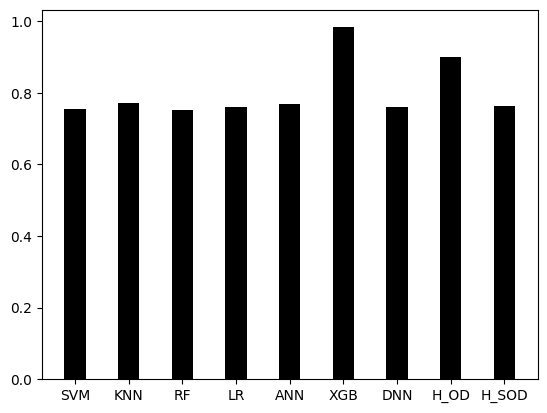

In [40]:
import matplotlib.pyplot as plt
plt.bar(acc.index, acc['train'], color ='black',width = 0.4)